# Plots 2 Electric boogaloo

In [6]:
# We start as always with out imports
import csv
import matplotlib.pyplot as plt
import numpy as np

# Interesting import, ill explain here why... when I find out
from matplotlib.colors import ListedColormap

# once again importing the iris dataset
from sklearn import datasets

In [11]:
# now I load in my daaayta

iris = datasets.load_iris()
# Not sure why im setting thesse two variables at the moment....?
X = iris.data
tgt = iris.target

In [68]:
# And now I load in the csv data. The data is from an imu device which is an accelerometer
# This data has 6 columns, 3 for the x,y,z position and 3 for the gyroscope position.
# We need to make two arrays for each of the sets.

# This creates an empty array using numpy which we can use in a moment to populate with out data
# It speficies an array with 1 row and 3 columns, with the data type being that of float
# Update I came back and turned these off.... turns out you don't need them, completely pointless
# axis_set = np.empty((0,3), float)
# gyro_set = np.empty((0,3), float)

# Now we read the csv file in and place the data into our array
with open("imu_dataset.csv", newline="") as file:
    reader = csv.reader(file)

    for line in reader:
        # print(line)
        # So first of all, the first element in each row is the index number and we dont need that
        # Secondly a numpy array, like the ones we define above, cant have append called on them
        # so instead with have to set them equal the np main import and call append on that, passing
        # in an array object, themself, and our three columns of data we want, which I put as a list

        # So update since the above comments, I had to create an array to stored each element of the line 
        # as an element in an np.array, and then call append below, slice which columns I wanted. I think this
        # Makes it multi dimensional so I cant just raw pass in line[x], like i initally wanted too...
        temp = np.array([float(line[1]),float(line[2]),float(line[3]),float(line[4]),float(line[5]),float(line[6])])
        
        axis_set = np.append(axis_set, [temp[0:3]], axis = 0)
        gyro_set = np.append(gyro_set, [temp[3:6]], axis = 0)
        
# print(axis_set)
# print(gyro_set)

# UPDATE, I came back and turned off out initiated arrays.... turns out you didnt need to even do that.

## Time to get plotin`

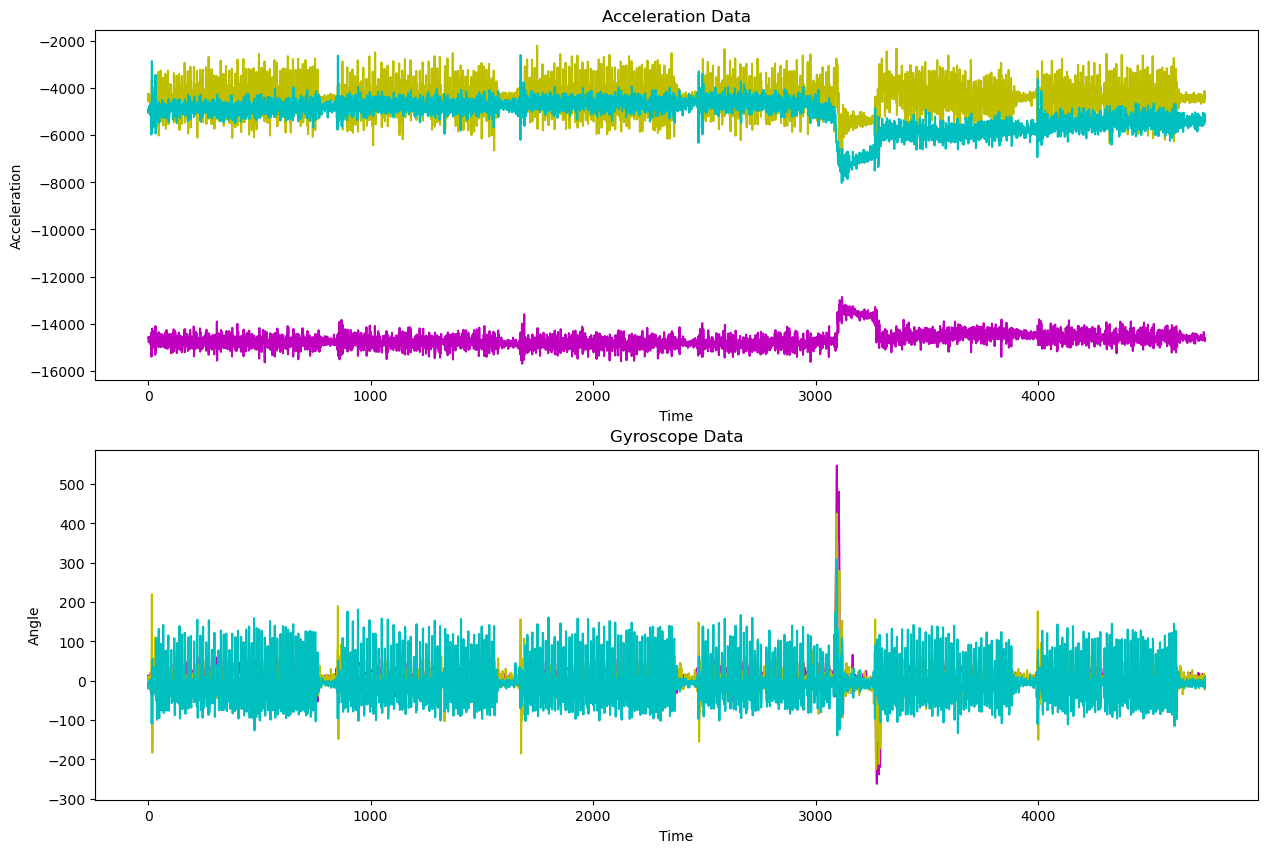

In [125]:
# The data contains 5000 points of data.... lol, 250 seconds, so 1/20th per piece? I think....

# We need to initialise the start and end point of the data for our plots, this way we can quickly
# Adjuest what part of the data we are analysining
start = 250
end = 5000

# Creating da plot man`
fig, ax=plt.subplots(nrows=2, figsize=(15, 10))
# So the number after start and end is the steps we will jump in the data, that way we are ploting only
# the values relavent to each axis, 0 = x, 1 = y, z = 2.... you get what i mean
ax[0].plot(axis_set[start:end,0], "m-")
ax[0].plot(axis_set[start:end,1], "y-")
ax[0].plot(axis_set[start:end,2], "c-")
ax[0].set_title("Acceleration Data")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Acceleration")

# And now we do the same for the gyro set
ax[1].plot(gyro_set[start:end,0], "m-")
ax[1].plot(gyro_set[start:end,1], "y-")
ax[1].plot(gyro_set[start:end,2], "c-")
ax[1].set_title("Gyroscope Data")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Angle")

plt.show()

I think it would be cool to calculate the mean of the above acceleration and track every time... say, the yellow line breaks <br>
out of the mean by x amount, and add it to a count, that way we could count how often a sheep is chewing each rumination cycle.

In [129]:
# Im gonna try do it.... 

# So im goin to take the period to just before the first rumination starts to the last one
# There is a total of 6 periods. Im going to divide the total number I get at the end to
# Find the average chews per period. And to find a single chew, I will set a threshold of 50
# On the gyro scope, which seems the most sensitive for this. So any time it gets a reading
# over 50, that will count as a chew.... lets see what we find

# Deciding to isolate a single period as well so we can test our avg and see how accurate it is
chewing_for_one_period = gyro_set[1050:1850, 2]
chewing_for_all_periods = gyro_set[225:5000, 2]

# Calculate for the first period
count_for_one_period = 0
for chew in chewing_for_one_period:
    if chew > 50:
        count_for_one_period +=1

# Calculate for all periods
count_for_all_periods = 0
for chew in chewing_for_all_periods:
    if chew > 50:
        count_for_all_periods +=1

# our findings
print(f"The total amount of chews for the first period only is: {count_for_one_period}")
print(f"The average of all the chewing over each period is: {count_for_all_periods / 6}")
print(f"The difference from one period to our average id {count_for_one_period - (count_for_all_periods/6)}")



The total amount of chews for the first period only is: 83
The average of all the chewing over each period is: 83.5
The difference from one period to our average id -0.5


Not gonna lie... the above made me giddy like a school girl

## Scatter time bby

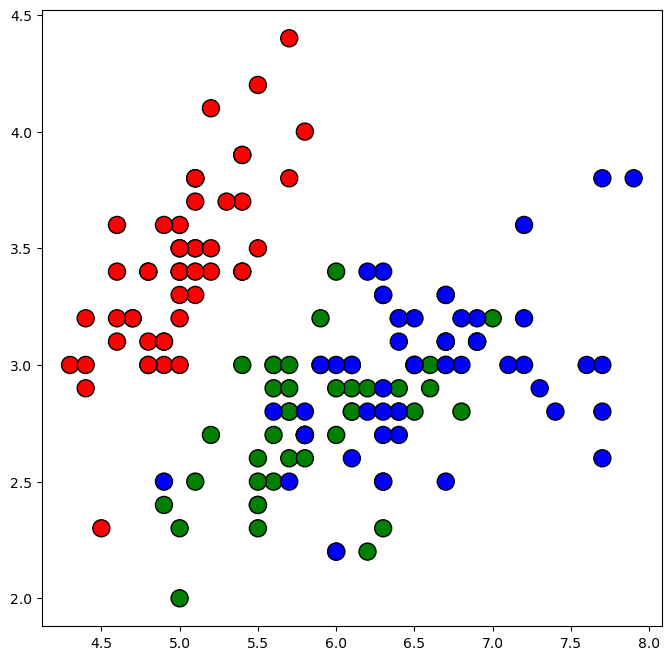

In [141]:
# Back to our iris data... lets start plotting and ill explain as i go

# Ok so straight away a bunch of random new stuff. This is from matplotlib, we imported it above
# More details here: https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.ListedColormap.html
# But essentially its a basic set of colours we are speficiying for our scatter plot... that's really
# all I could gleam
cmap_bold = ListedColormap(["red", "green", "blue"])

fig,ax=plt.subplots(figsize=(8,8))
# Now we make the scatter plot, a few things to note here are
# X here is what we assigned our iris.data as all the way back up the top
# It looks like we are assigning the x axis with all the data from column 0
# i.e column 1 and the y axis with column 1 i.e column 2... that's all I can
# say about that, it is new to me too.
# so the c=tgt means we are targetting the colormap on our target data? we set
# tgt up in the import section too, to iris.target... oh the targets are all 
# the iris flower names, the different species, i guess that sklearn dataset things...
# Edgecolor is the outside of each dot and s is the size of each dot
ax.scatter(X[:, 0], X[:, 1], c=tgt, cmap=cmap_bold, edgecolor='k', s=150)

plt.show()

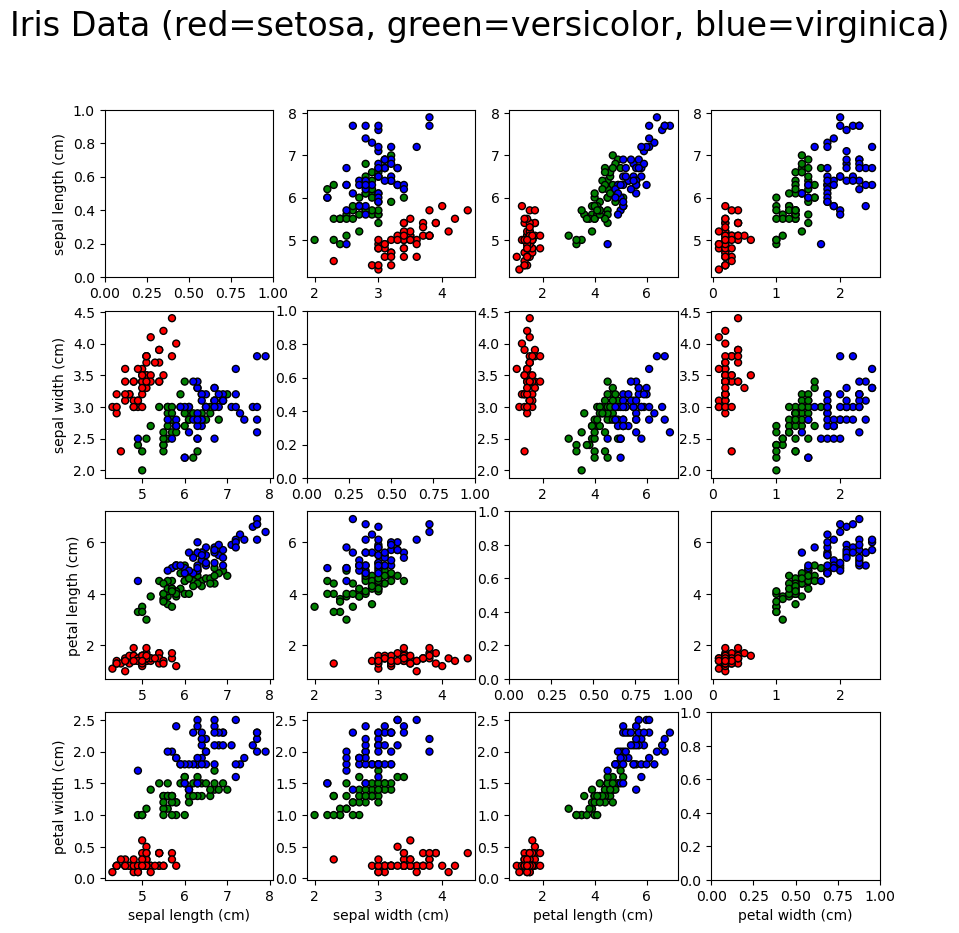

In [153]:
# Now lets plot every piece of data against every piece of data in our data set.. comments must be kept brief

cmap_bold = ListedColormap(["red", "green", "blue"])

# Creating a 4 by 4 grid of plots
fig, axs=plt.subplots(4,4, figsize=(10,10))

for x in range(0,4):
    for y in range(0,4):
        # so if we are on the left hand side, for every y, print the label for y... abit abstractly tricky to think about
        # but very straight forward.
        if x == 0:
            axs[y, x].set_ylabel(iris.feature_names[y])
        # The same but for the x axis... again I would have a hard time coming up with this alone....
        if y == 3:
            axs[y, x].set_xlabel(iris.feature_names[x])
        if x != y:
            axs[y, x].scatter(X[:, x], X[:, y], c=tgt, cmap=cmap_bold, edgecolor='k', s=25)
fig.suptitle("Iris Data (red=setosa, green=versicolor, blue=virginica)", fontsize=24)
plt.show()

## Horizontal Barbois

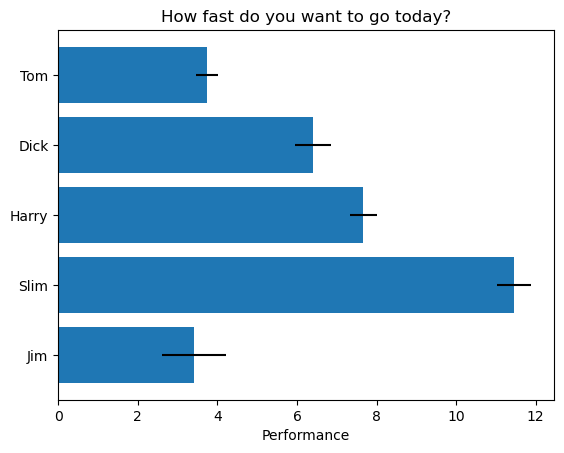

In [166]:
# Gotta go fast here... random seed set for random usage for data shortly
np.random.seed(2352346346)

fig, ax=plt.subplots()

# Creating some made up data. The data is just to show how the chart works
people=("Tom", "Dick", "Harry", "Slim", "Jim")
y_axis = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_axis, performance, xerr=error, align="center")
ax.set_yticks(y_axis)
# This is cool, this is how you set labels from the data names.
ax.set_yticklabels(people)
ax.invert_yaxis()
ax.set_xlabel("Performance")
ax.set_title("How fast do you want to go today?")

plt.show()

## Histogram

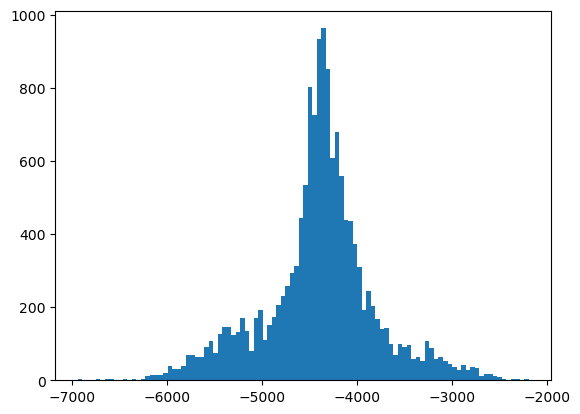

In [181]:
# A histogram of our sheep data set from earlier
fig, ax = plt.subplots()
nbins = 100

# Selecting dimension 1 from our accelerometer data.
# The histo divides up the set of data by the bin amaount, all the data is then distributed between the bins
# I dont got much more for you on histos at the moment, look up the docs at matplotlib
# In short, I put the data i want in and select the number of bins, dont know what the n, bins, patch stuffs about
n, bins, patches = ax.hist(axis_set[:,1], nbins)

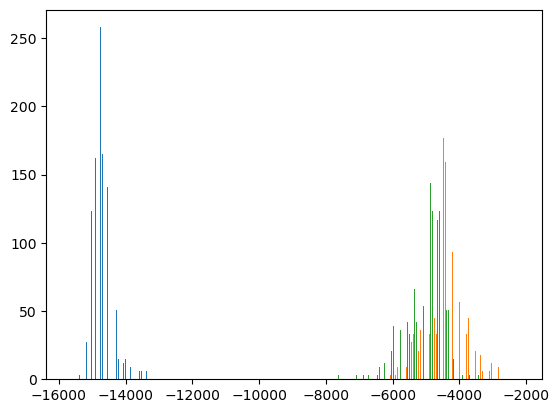

In [177]:
# This is the same as above, but im not selecting the 1st only column, but all of the data
fig, ax = plt.subplots()
n, bins, patches = ax.hist(axis_set, nbins)

## Box plot

Text(0.5, 1.0, 'Multi Box plot')

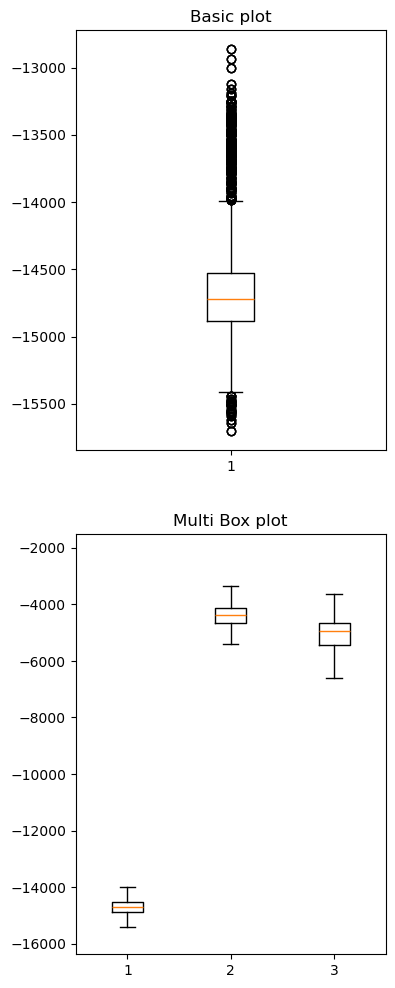

In [184]:
# Box and whisker plots

# two rows of plots
fig, axs=plt.subplots(nrows=2, figsize=(4, 12))

# A basic boxy
axs[0].boxplot(axis_set[:, 0])
axs[0].set_title("Basic plot")

# We speficy that the outliers are empty, so we are excluding them from the plot
axs[1].boxplot(axis_set, sym=" ")
axs[1].set_title("Multi Box plot")

In [186]:
# In the above box plots, that second box plot is interesting, it is showing the 3 Acceleration pieces of data
# The first one was the data that sat super low in the line plot all the way at the start of this notebook
# the last two columns are the other two closely tied columns

## 2DHISTO / HEATMAP

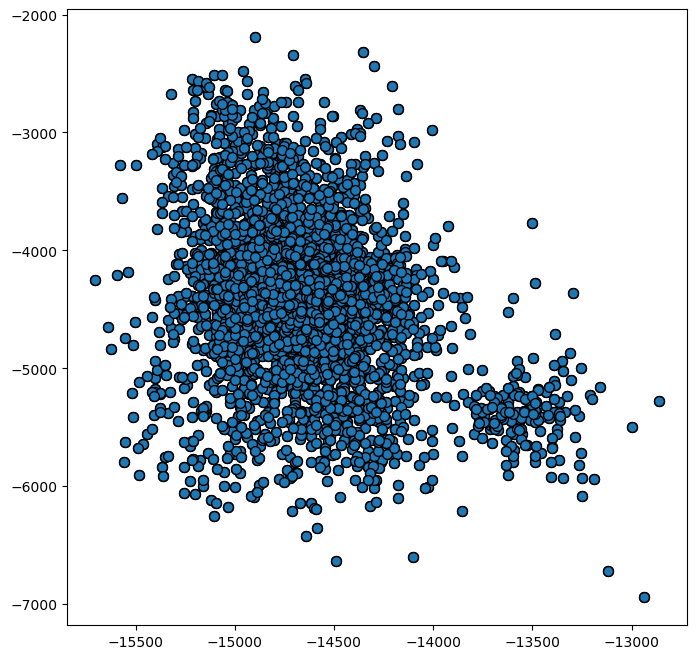

In [191]:
# Time for some heatmaps baby

# First we create a scatter plot(This is to waste time but also to show how heatmaps are better....)
fig,ax=plt.subplots(figsize=(8,8))

ax.scatter(axis_set[:, 0], axis_set[:, 1], edgecolor='k', s=50)

plt.show()

In [193]:
# Hard to seee whats goiong on in the middle of that scatter right? enter the heatmap

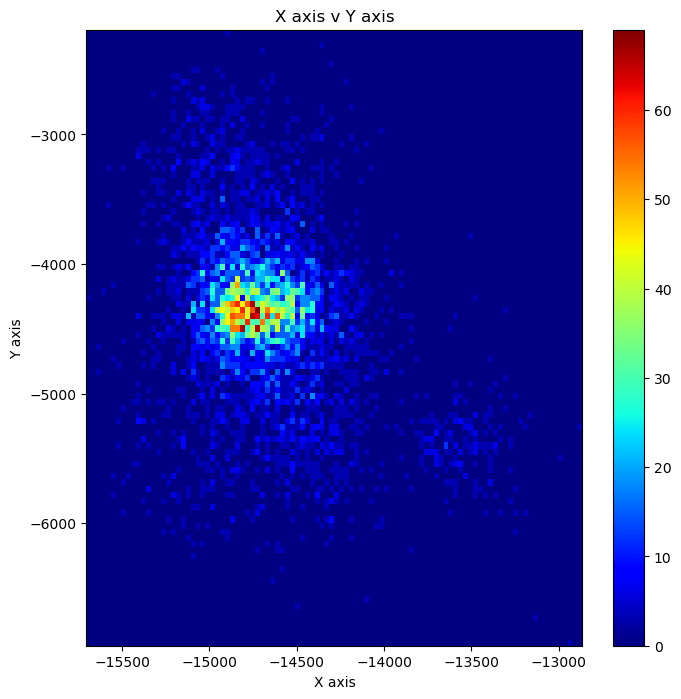

In [207]:
fig, ax = plt.subplots(figsize=(8,8))

# calling the 2d histo, and passing in column 0 and column 1 from out sheepy data
# jet is a cmap default color
hs = ax.hist2d(axis_set[:, 0], axis_set[:, 1], bins=100, cmap="jet")
# Initiationg a colorbar
cb = fig.colorbar(hs[3], ax=ax)

ax.set_ylabel("Y axis")
ax.set_xlabel("X axis")
ax.set_title("X axis v Y axis")

plt.show()

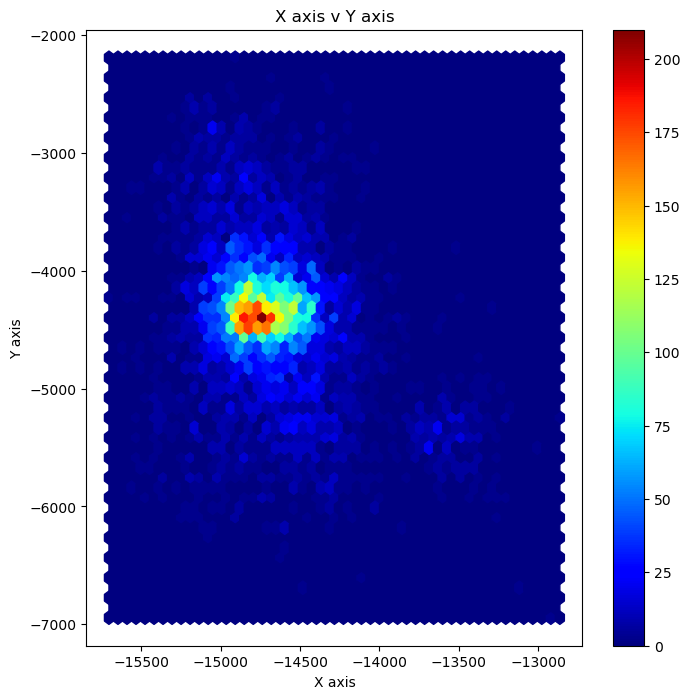

In [217]:
# A hexagonigal version of the heatmap, exactly the same, just change bins to gridsize, and no [3] on the hs in the cb
# Check above 2dhist for more deatils on all values here


fig, ax = plt.subplots(figsize=(8,8))


hs = ax.hexbin(axis_set[:, 0], axis_set[:, 1], gridsize=50, cmap="jet")
# Initiationg a colorbar
cb = fig.colorbar(hs, ax=ax)

ax.set_ylabel("Y axis")
ax.set_xlabel("X axis")
ax.set_title("X axis v Y axis")

plt.show()

In [219]:
# fin